# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
import os

# TODO: fill this in based on where you saved the training and testing data
training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
import random
import numpy as np
# TODO: number of training examples
keep_ratio = 1

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

train_idx = np.random.randint(0, X_train.shape[0], size=(X_train.shape[0] * keep_ratio))
n_train = int(X_train.shape[0] * keep_ratio)

# TODO: number of testing examples
test_idx = np.random.randint(0, X_test.shape[0], size=(X_test.shape[0] * keep_ratio))
n_test = int(X_test.shape[0] * keep_ratio)

X_train = X_train[train_idx]
y_train = y_train[train_idx]
X_test = X_test[test_idx]
y_test = y_test[test_idx]

# TODO: how many classes are in the dataset
n_classes = y_train.max() + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


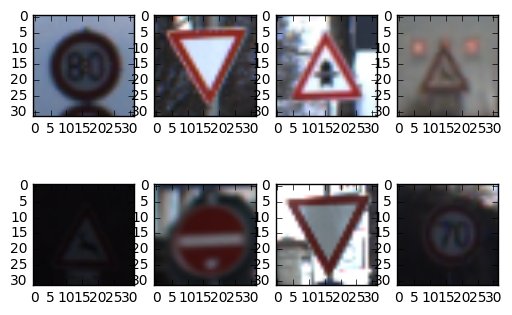

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
%matplotlib inline
fig = plt.figure()

for i in range(1, 9):
    a=fig.add_subplot(2,4,i)
    idx = random.randint(0, n_train)
    plt.imshow(X_train[idx])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
from sklearn import preprocessing

def rgb_to_grayscale(images, flatten=0):
    """
    images: matrix of RGB images
    return: flattened grayscale images
    """
    image_shape = images.shape
    if flatten:
        return np.average(images, axis=3).reshape(image_shape[0], image_shape[1] * image_shape[2])
    else:
        return np.average(images, axis=3).reshape(image_shape[0], image_shape[1], image_shape[2], 1)
    
def normalize(images, flatten=0):
    """
    images: matrix of grayscale
    return: mean subtracted, scaled between -1 and 1
    """
    return images
    n_train = images.shape[0]
    if flatten:
        subtracted_mean = images - np.mean(images, axis=1).reshape(n_train, 1)
    else:
        subtracted_mean = images - np.mean(images)
    return subtracted_mean
    #return preprocessing.scale(images)
    #min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
    #return min_max_scaler.fit_transform(subtracted_mean)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

I initially tried preprocessing the images by obtaining the grayscale, and to flatetenning the the images into a single color channel. Additionally, I applied min-max scaling to have the values between 0 and 1 to ensure that all features (or pixels) are treated equally, and hence improves the accuracy of the classifier.

I then decided to keep the 3 color channels, as color is important in determining the meaning of a traffic sign.

The labels use one-hot encoding since that is the input to the model, and was computed with the sklearn module.

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
"""
X_train_gray = rgb_to_grayscale(X_train)
X_train_normalized = normalize(X_train_gray)

X_test_gray = rgb_to_grayscale(X_test)
test_features = normalize(X_test_gray)
"""

train_features = normalize(X_train)
test_features = normalize(X_test)

encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=832289)

In [ ]:
import os
pickle_file = 'traffic_signs_preprocessed.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': test_features,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

The training set was divided into two groups: the training and the validation data. Using sklearn's train_test_split, I chose 5% of the total training data to be used for validation, ensuring that we aren't overfitting to the training data. The test set is kept as is.

To improve the model, fake data can be generated by manipulating the current training data and applying some iamge processing to simulate new data. Since traffic signs in the real world can be affected by different lighting conditions, obstructed and many more things, we can fake these conditions by changing the luminosity of the image, adding shadows, rotating the signs, adding noise and cropping out the images to have more data.

In [107]:
import tensorflow as tf

tf.reset_default_graph()

def get_weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def get_bias(shape, constant=1):
    if constant != 1:
        return tf.Variable(tf.zeros(shape))
    else:
        return tf.constant(0.1, shape=shape)
    
def get_conv2d(x, W, stride):
    return tf.nn.conv2d(x, W, [1, stride, stride, 1], padding='SAME')

def get_loss(logits, y_true):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_true)
    #cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, y_true)
    loss = tf.reduce_mean(cross_entropy)
    return loss

def get_maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def inference(images, keep_prob):
    n_features = image_shape[0] * image_shape[1]

    filter_size_width = 5
    filter_size_height = 5
    color_channels = 3
    k_output = [32, 64, 192, 256]
    learning_rate = 0.001

    # conv0 layer : 32 x 32 x 3
    with tf.name_scope('conv0'):
        W_conv0 = get_weight([filter_size_width, filter_size_height, color_channels, k_output[0]])
        b_conv0 = get_bias([k_output[0]], constant=0)
        conv0 = get_conv2d(images, W_conv0, stride=1)
        h_conv0 = tf.nn.relu(conv0 + b_conv0)
        h_conv0 = get_maxpool2d(h_conv0, k=2)

    # conv1 layer : 16 x 16 x 32
    with tf.name_scope('conv1'):
        W_conv1 = get_weight([filter_size_width, filter_size_height, k_output[0], k_output[1]])
        b_conv1 = get_bias([k_output[1]])
        conv1 = get_conv2d(h_conv0, W_conv1, stride=1)
        h_conv1 = tf.nn.relu(conv1 + b_conv1)
        h_conv1 = get_maxpool2d(h_conv1, k=2)

    # conv2 layer : 8 x 8 x 64
    with tf.name_scope('conv2'):
        W_conv2 = get_weight([filter_size_width, filter_size_height, k_output[1], k_output[2]])
        b_conv2 = get_bias([k_output[2]])
        conv2 = get_conv2d(h_conv1, W_conv2, stride=1)
        h_conv2 = tf.nn.relu(conv2 + b_conv2)
        h_conv2 = get_maxpool2d(h_conv2, k=2)


    # fc1 layer : 4 x 4 x 192
    with tf.name_scope('fc1'):    
        prev_layer_shape = h_conv2.get_shape().as_list()
        prev_dim = prev_layer_shape[1] * prev_layer_shape[2] * prev_layer_shape[3]
        W_fc1 = get_weight([prev_dim, 512])
        b_fc1 = get_bias([512])
        h_conv2_flat = tf.reshape(h_conv2, [-1, prev_dim])

        # 1 x 1 x 3072
        fc1 = tf.matmul(h_conv2_flat, W_fc1) + b_fc1
        fc1 = tf.nn.relu(fc1)

    # fc2 layer : 1 x 1 x 512
    with tf.name_scope('fc2'):
        W_fc2 = get_weight([512, 256])
        b_fc2 = get_bias([256])
        fc2 = tf.matmul(fc1, W_fc2) + b_fc2
        fc2 = tf.nn.relu(fc2)

    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob, seed=66478)
        
    # fc3 layer : 1 x 1 x 256
    with tf.name_scope('fc3'):
        W_fc3 = get_weight([256, n_classes])
        b_fc3 = get_bias([n_classes])
        fc3 = tf.matmul(fc2, W_fc3) + b_fc3

    #fc3 = tf.nn.relu(fc3)
    # 1 x 1 x 43

    # L2 regularization for the fully connected parameters.
    regularizers = (tf.nn.l2_loss(W_fc1) + tf.nn.l2_loss(b_fc1) +
                    tf.nn.l2_loss(W_fc2) + tf.nn.l2_loss(b_fc2) +
                    tf.nn.l2_loss(W_fc3) + tf.nn.l2_loss(b_fc3))
        
    return fc3, regularizers

x = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

logits, regularizers = inference(x, keep_prob)

######## testing ########
learning_rate = 0.0001

loss = get_loss(logits, y)

# Add the regularization term to the loss.
loss += 5e-4 * regularizers

with tf.name_scope('accuracy'):
    # Determine if the predictions are correct
    is_correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(logits), 1), tf.argmax(y, 1))
    # Calculate the accuracy of the predictions
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
    tf.scalar_summary('accuracy', accuracy)

# Add a scalar summary for the snapshot loss.
tf.scalar_summary("loss_value", loss)
# Create a variable to track the global step.
global_step = tf.Variable(0, name='global_step', trainable=False)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)#, global_step=global_step)
optimizer = tf.train.AdamOptimizer(5e-4).minimize(loss)

# Build the summary Tensor based on the TF collection of Summaries.
summary = tf.merge_all_summaries()

init = tf.initialize_all_variables()

# Create a saver for writing training checkpoints.
saver = tf.train.Saver()

In [110]:
import time
training_epochs = 50
batch_size = 100
display_step = 1
log_batch_step = 50
dropout_keep_prob = 0.5

batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# Feed dicts for training, validation, and test session
train_feed_dict = {x: train_features, y: train_labels, keep_prob: dropout_keep_prob}
valid_feed_dict = {x: valid_features, y: valid_labels, keep_prob: 1.0}
test_feed_dict = {x: test_features, y: test_labels, keep_prob: 1.0}

log_dir = "data3"

# Instantiate a SummaryWriter to output summaries and the Graph.
with tf.Session() as sess:
    summary_writer = tf.train.SummaryWriter(log_dir, sess.graph)
    #sess.run(init)
    saver.restore(sess, "data3/checkpoint-14")
    print("Model restored.")

    total_batches = int(len(train_features)/batch_size)
    for epoch in range(training_epochs):
        start_time = time.time()
        for i in range(total_batches):
            batch_start = i * batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            _, l = sess.run(
                [optimizer, loss], 
                feed_dict={x: batch_features, y: batch_labels, keep_prob: 0.8})

            if i % log_batch_step == 0:
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)

                training_accuracy = sess.run(accuracy, feed_dict={x: batch_features, y: batch_labels, keep_prob: 1.0})
                validation_accuracy = sess.run(accuracy, feed_dict=valid_feed_dict)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
                duration = time.time() - start_time
                print("Epoch:", '%04d' % (epoch+1),  "Step: %d" % (epoch * batch_size + i), "loss =", \
                    "{:.9f}".format(l), "Accuracy: %.7f" % (validation_accuracy),"duration = ", duration)

        summary_str = sess.run(summary, feed_dict=valid_feed_dict)
        summary_writer.add_summary(summary_str, epoch)
        summary_writer.flush()
        
        checkpoint_file = os.path.join(log_dir, 'checkpoint')
        saver.save(sess, checkpoint_file, global_step=epoch)

    # Check accuracy against Validation data
    validation_accuracy = sess.run(accuracy, feed_dict=valid_feed_dict)
    print("Validation Accuracy:", validation_accuracy)
    #test_accuracy = sess.run(accuracy, feed_dict=test_feed_dict)
    #print("Test Accuracy:", test_accuracy)

Model restored.
Epoch: 0001 Step: 0 loss = 5.079576492 Accuracy: 0.0887302 duration =  3.567056655883789
Epoch: 0001 Step: 50 loss = 4.846253872 Accuracy: 0.0917899 duration =  28.255085229873657
Epoch: 0001 Step: 100 loss = 5.065148354 Accuracy: 0.1019888 duration =  50.70201802253723
Epoch: 0001 Step: 150 loss = 4.961965084 Accuracy: 0.0902601 duration =  73.13897228240967
Epoch: 0001 Step: 200 loss = 4.806252480 Accuracy: 0.0922998 duration =  95.67501926422119
Epoch: 0001 Step: 250 loss = 4.864131451 Accuracy: 0.0922998 duration =  121.12374114990234
Epoch: 0001 Step: 300 loss = 5.011816025 Accuracy: 0.1065783 duration =  147.44919085502625
Epoch: 0001 Step: 350 loss = 4.906854153 Accuracy: 0.1070882 duration =  174.32979035377502
Epoch: 0002 Step: 100 loss = 4.981126308 Accuracy: 0.0922998 duration =  3.4870002269744873
Epoch: 0002 Step: 150 loss = 4.787728786 Accuracy: 0.1081081 duration =  33.09755873680115
Epoch: 0002 Step: 200 loss = 4.994364262 Accuracy: 0.1050484 duration = 

KeyboardInterrupt: 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture has 3 convolutional layers which use a ReLu as activation function, followed by a maxpool with a stride of 2. Spatially, the input image dimensions (width and height) are reduced progressively, but increase in depth.

The network then includes 3 fully connected layers, where the final layer has a size of 43 classes. Before the third and final fully connected layer, a dropout component was added with a certain probability.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
# Parameters

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Initially, I used the GradientDescentOptimizer, and tried with various step sizes (0.001 and 0.0001 for example). However, I would either hit a plateau around ~3.00 loss and always obtain less than 10% accuracy.

Using AdamOptimizer obtained significantly better results. I got passed the initial local minimum where I seemed to get stuck with the previous optimizer. One down side of this optimizer is that it is slightly longer to compute.

In both cases, I experimented with batch sizes of 50 and 100 (the difference was not thoroughly compared). It took approximately 20 epochs to obtain a loss of 0.50 and accuracy over 90%. The plots from Tensorboard are attached below.

<img src="http://i.imgur.com/Wbgkihh.png">

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

To come up with the model architecture, I was inspired by AlexNet which has proven to be effective at classifying images (see ImageNet results) and is relatively simple to implement. Since I am limited by my computing resources, I tried to simplify the architecture as much as I could, without compromising performance. In the end, my model includes convolutional layers to capture enough complexity in the image data, fully connected layers to finally end up with the class predictions and pooling to downscale and reduce the dimensions of the images.

This model is a simplified version of AlexNet which allowed for reasonable training time given my resources, but still resulted in good performance (> 96%) as seen above.

Finally, the prevent overfitting, I added dropout layers with 50% probability, and added regularization to penalize weights with higher value.

As mentionned above, I tried to play around with the learning rate to overcome the issues I had. For instance, my learning rate value was too high, which caused the loss the diverge (it was reaching Inf/NaN). After lowering the learning rate, I got into alot of plateaus and local minimas. Tweaking the learning rate was enough to get past the difficulties. In the above plot, we can see that past tries where I struggled to improve the loss/accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

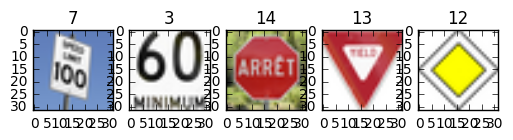

In [164]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
from PIL import Image


#reading in an image
image1 = Image.open('100km.jpg')
image1 = image1.resize((32, 32), Image.ANTIALIAS)
image1 = np.array(image1)

image2 = Image.open('60km.jpg')
image2 = image2.resize((32, 32), Image.ANTIALIAS)
image2 = np.array(image2)

image3 = Image.open('stop-quebec.JPG')
image3 = image3.resize((32, 32), Image.ANTIALIAS)
image3 = np.array(image3)

image4 = Image.open('yield.jpg')
image4 = image4.resize((32, 32), Image.ANTIALIAS)
image4 = np.array(image4)

image5 = Image.open('priority-road.jpg')
image5 = image5.resize((32, 32), Image.ANTIALIAS)
image5 = np.array(image5)

new_images = [image1, image2, image3, image4, image5]
new_labels = [7, 3, 14, 13, 12]

#printing out some stats and plotting
fig = plt.figure()

for i in range(1, 6):
    a = fig.add_subplot(1,5,i)
    a.set_title(str(new_labels[i-1]))
    plt.imshow(new_images[i-1])
    
new_labels = encoder.transform(new_labels)
new_labels = new_labels.astype(np.float32)

In [180]:
test_feed_dict = {x: new_images, y: new_labels, keep_prob: 1.0}

prediction = tf.argmax(tf.nn.softmax(logits), 1)
with tf.Session() as sess:
    saver.restore(sess, "data3/checkpoint-17")
    print("Model restored.")
    prediction = sess.run(prediction, feed_dict=test_feed_dict)
    print(prediction)

Model restored.
[11 11 14 13 12]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

My algorithm properly classified the stop sign. the yield and the priority road sign. However, for speed limit signs, it had a false prediction, thinking it was a "right of way at the next intersection" sign. If we look at the speed limit signs from the training set, it is clear that the speed limit sign shape is different than the ones that I selected online (Quebec road signs). Indeed, the German speed limit signs have circular shape, and have a red outline. Without any training images that have square shaped speed limit signs, it is very likely that the classifier does not predict them properly.

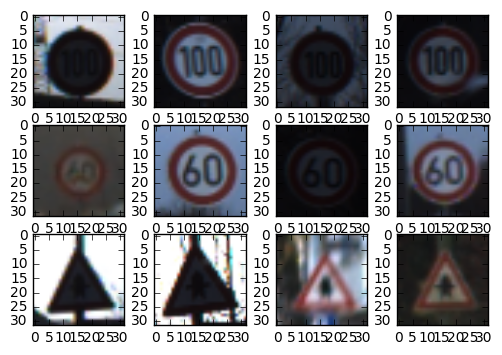

In [179]:
fig = plt.figure()

for i in range(1, 5):
    a=fig.add_subplot(3,4,i)
    plt.imshow(test_features[y_test == 7][i])
    a=fig.add_subplot(3,4,i+4)
    plt.imshow(test_features[y_test == 3][i])
    a=fig.add_subplot(3,4,i+8)
    plt.imshow(test_features[y_test == 11][i])

Below are results from the testing data

In [119]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
test_feed_dict = {x: test_features, y: test_labels, keep_prob: 1.0}

with tf.Session() as sess:
    saver.restore(sess, "data3/checkpoint-17")
    print("Model restored.")
    validation_accuracy = sess.run(accuracy, feed_dict=test_feed_dict)
    print("Test Accuracy:", validation_accuracy)

Model restored.
Test Accuracy: 0.897862


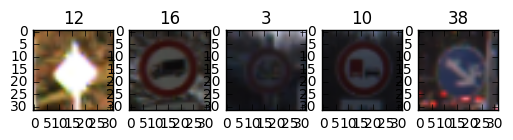

In [133]:
#test_feed_dict = {x: test_features, y: test_labels, keep_prob: 1.0}
fig = plt.figure()

for i in range(1, 6):
    a = fig.add_subplot(1,5,i)
    a.set_title(str(np.argmax(test_labels[i+1])))
    plt.imshow(test_features[i+1])

In [134]:
test_feed_dict = {x: test_features[2:7], y: test_labels[2:7], keep_prob: 1.0}

prediction = tf.argmax(tf.nn.softmax(logits), 1)
with tf.Session() as sess:
    saver.restore(sess, "data3/checkpoint-17")
    print("Model restored.")
    prediction = sess.run(prediction, feed_dict=test_feed_dict)
    print(prediction)

Model restored.
[15 16  3 10 38]


As seen from the output above, the algorithm correctly predicted 4 out of 5 signs, but had trouble with the first sign (true label = 12 or "Priority road"). The image is in fact of poor quality and would be difficult even for a human driver. It is too bright and the content of the sign is unreadable, which explains the incorrect prediction.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** It would depend on the source of the captured images or the live camera stream. Additionally, these images are cropped out to only have the road sign in the image. In a live camera stream there are lots of other images, hence one would need to detect the objects, crop them and out only pass those to the classifier.

The current classifier for would perform fairly well on capture pictures/live camera stream of someone driving in Germany, since that is what the classifier was trained mostly with.

However, it was seen from above that the results from the testing set that the performance was inferior to the training set scores, which yielded ~90% accuracy compared to >96% accuracy.

When comparing with new images, the captured pictures had an accuracy of 80% which is close to the testing sets' score of 89%. As mentioned previously, this would be resolved with a larger training set that goes beyond ther German traffic sign dataset (since the captured images were from Quebec, Canada).

In [182]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
test_feed_dict = {x: new_images, y: new_labels, keep_prob: 1.0}

probs = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(probs, 5)

with tf.Session() as sess:
    saver.restore(sess, "data3/checkpoint-17")
    print("Model restored.")
    probs = sess.run(top_5, feed_dict=test_feed_dict)
    print(probs)

Model restored.
TopKV2(values=array([[  9.99855161e-01,   1.06594714e-04,   3.82356120e-05,
          5.39665592e-08,   2.04999573e-09],
       [  9.36944664e-01,   6.30459115e-02,   8.40756002e-06,
          8.40134362e-07,   1.58986353e-07],
       [  1.00000000e+00,   2.93586666e-09,   1.35603802e-19,
          1.49913511e-22,   2.67841430e-24],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.58178825e-33,   8.57496956e-34,
          2.69339514e-38,   9.62259184e-39]], dtype=float32), indices=array([[11, 30, 23, 31, 18],
       [11,  1, 30,  6, 28],
       [14, 17,  0,  4,  5],
       [13,  0,  1,  2,  3],
       [12,  9, 42, 34, 40]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** As seen from above, the classifier is almost 100% certain about its predictions for the 3 last signs. However, for the speed limits (class 7 and 3), it first predicted class 11 with above 90% for both cases. Unfortunately, they do not appear in the top 5 results, which somewhat indicates that perhaps my classifier is not very strong at identifying the letters in the road sign content (since the numbers of the speed limit is consistent despite the shape).

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

N/A

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.